In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier, plot_importance

In [2]:
data = pd.read_csv("C:\Lachin\Data Science\Data science\ML workshop 1\Datasets\Loan.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.drop('Loan_ID', axis=1, inplace=True)

In [5]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
cls=data.describe()
cls.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

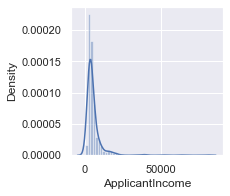

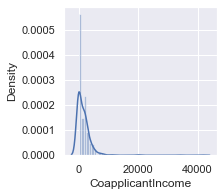

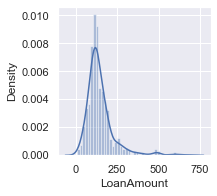

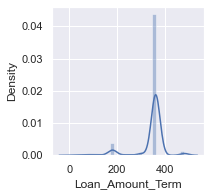

In [7]:
for i,j in enumerate(cls.columns):
    if j == 'Credit_History':
        break
    sns.set_theme()
    plt.figure(figsize=(6,6))
    plt.subplot(2,2,i+1)
    sns.distplot(data[j])
plt.show()

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

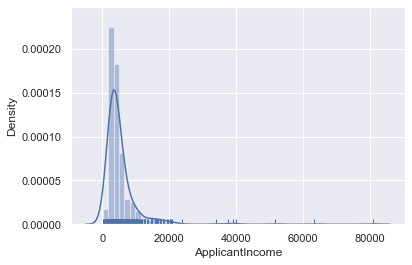

In [9]:
sns.distplot(data.ApplicantIncome, rug=True)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

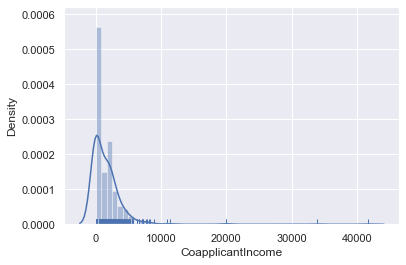

In [10]:
sns.distplot(data.CoapplicantIncome, rug=True)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

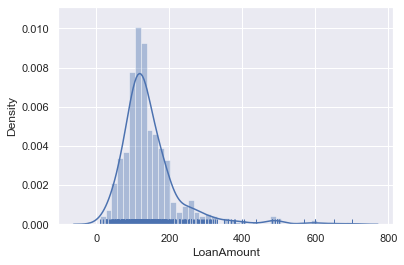

In [11]:
sns.distplot(data.LoanAmount, rug=True)

In [12]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [14]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
str_data=data['Credit_History'].astype('str')

In [16]:
str_data

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: object

In [17]:
data.drop('Credit_History', axis=1, inplace=True)

In [18]:
data['Credit_History'] = str_data

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Credit_History
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,1.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,1.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Credit_History     614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [21]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Credit_History
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,1.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,1.0


In [22]:
data_cat=data[['Gender','Married','Dependents','Self_Employed','Property_Area','Credit_History']]

In [23]:
data_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area',
       'Credit_History'],
      dtype='object')

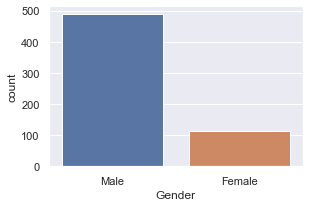

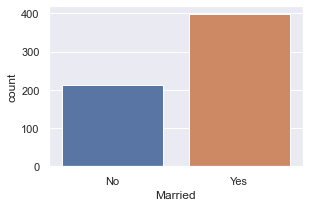

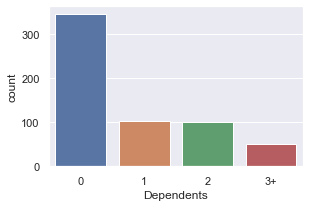

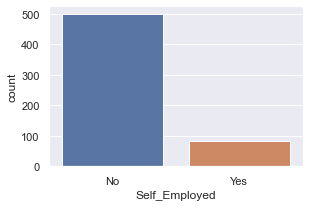

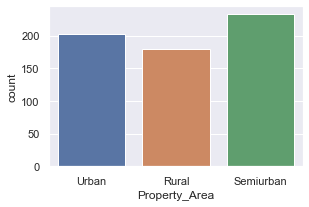

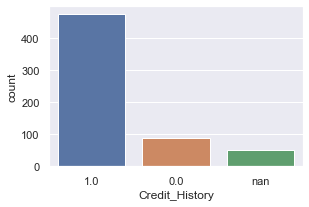

In [24]:
for i,j in enumerate(data_cat.columns):
    plt.figure(figsize=(10,10))
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[j])
plt.show()

In [25]:
des = data.describe()
des.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

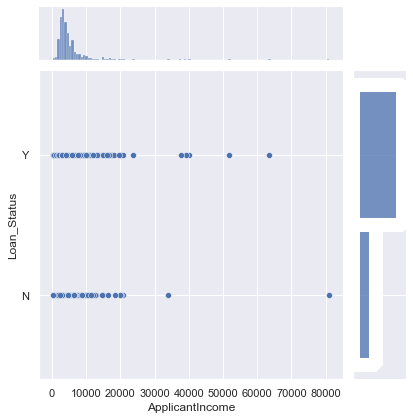

In [26]:
sns.jointplot(data=data, x='ApplicantIncome',y='Loan_Status')#Some outliers are visible

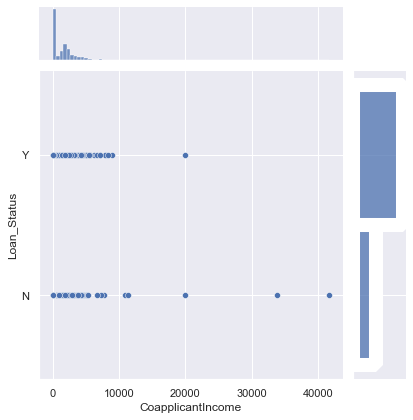

In [27]:
sns.jointplot(data=data, x='CoapplicantIncome',y='Loan_Status')

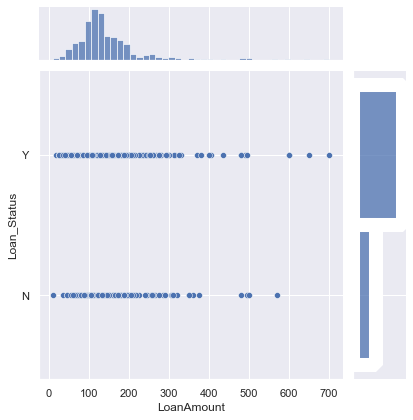

In [28]:
sns.jointplot(data=data, x='LoanAmount',y='Loan_Status')

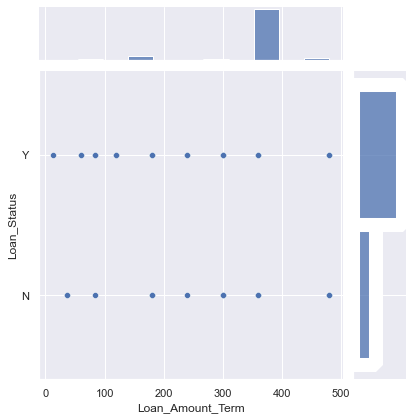

In [29]:
sns.jointplot(data=data, x='Loan_Amount_Term',y='Loan_Status')#somewhat categorical Variable

<AxesSubplot:xlabel='ApplicantIncome'>

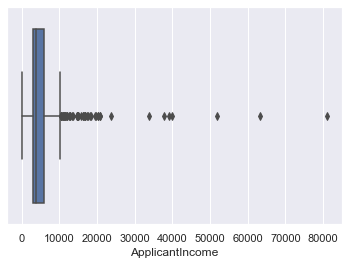

In [30]:
#Treating Outliers
sns.boxplot(data=data, x=data['ApplicantIncome'])#outliers are visible

<AxesSubplot:xlabel='CoapplicantIncome'>

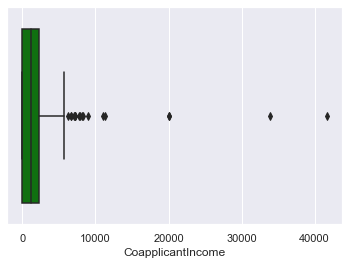

In [31]:
sns.boxplot(data=data, x=data['CoapplicantIncome'], color='green')

<AxesSubplot:xlabel='LoanAmount'>

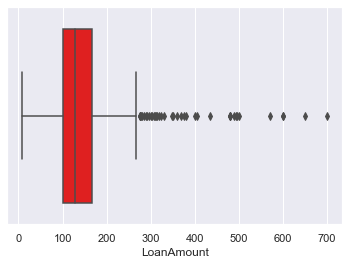

In [32]:
sns.boxplot(x=data['LoanAmount'], color='red')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Credit_History     614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [34]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
out_data = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [36]:
Q1 = out_data.quantile(0.25)
Q3 = out_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
dtype: float64


In [37]:
out_rows = ((out_data < Q1-1.5*IQR)|(out_data > Q3 + 1.5*IQR))

False    564
True      50
Name: ApplicantIncome, dtype: int64


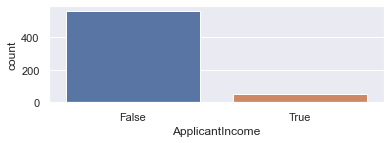

False    596
True      18
Name: CoapplicantIncome, dtype: int64


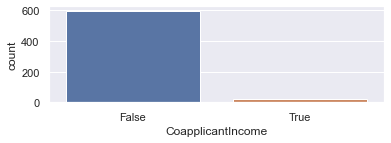

False    575
True      39
Name: LoanAmount, dtype: int64


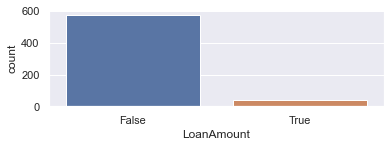

In [38]:
for i,j in enumerate(out_rows.columns):
    plt.figure(figsize=(6,6))
    plt.subplot(3,1,i+1)
    sns.countplot(x=out_rows[j])
    print(out_rows[j].value_counts())
    plt.show()

In [39]:
out_rows1 = ((out_data < Q1-1.5*IQR)|(out_data > Q3 + 1.5*IQR)).any(axis=1)

In [40]:
print("Before Outlier treatment, data shape is: {}".format(data.shape))
df = data[~out_rows1]
print("After Outlier Treatment, data shape is: {}".format(df.shape))

Before Outlier treatment, data shape is: (614, 12)
After Outlier Treatment, data shape is: (537, 12)


In [41]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,537.000000,537.000000,517.000000,523.000000
mean,4059.981378,1329.862048,126.833656,342.217973
std,1852.750181,1424.515921,46.048881,66.158800
min,150.000000,0.000000,9.000000,12.000000
25%,2755.000000,0.000000,99.000000,360.000000
50%,3600.000000,1280.000000,122.000000,360.000000
75%,4917.000000,2209.000000,154.000000,360.000000
max,10139.000000,5701.000000,267.000000,480.000000


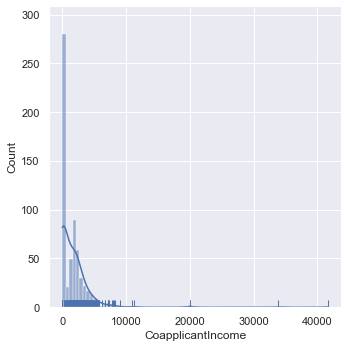

In [42]:
sns.displot(data['CoapplicantIncome'], kde=True, rug=True)

In [43]:
#Missing Value Treatments

In [44]:
df.isnull().sum()

Gender                9
Married               3
Dependents           14
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
Credit_History        0
dtype: int64

In [45]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)#Treating missing Values

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [46]:
df.isnull().sum()

Gender                9
Married               3
Dependents           14
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
Credit_History        0
dtype: int64

In [47]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [48]:
df.isnull().sum()

Gender                9
Married               3
Dependents           14
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Property_Area         0
Loan_Status           0
Credit_History        0
dtype: int64

In [49]:
print("shape of dataframe before removing missing values is: {}".format(df.shape))

shape of dataframe before removing missing values is: (537, 12)


In [50]:
#Oathers are categorical variables, so cannot be filled
df.dropna(how='any', inplace=True)
print("shape of dataframe after removing missing values is: {}".format(df.shape))

shape of dataframe after removing missing values is: (485, 12)


<ipython-input-50-03e755dac0b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='any', inplace=True)


In [51]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
Credit_History       0
dtype: int64

In [52]:
df.duplicated().sum()
#In case duplicates are there, df.drop_duplicates(inplace=True)

0

In [53]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Credit_History
0,Male,No,0,Graduate,No,5849,0.0,126.833656,360.0,Urban,Y,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Rural,N,1.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,Urban,Y,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,Urban,Y,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,Urban,Y,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             485 non-null    object 
 1   Married            485 non-null    object 
 2   Dependents         485 non-null    object 
 3   Education          485 non-null    object 
 4   Self_Employed      485 non-null    object 
 5   ApplicantIncome    485 non-null    int64  
 6   CoapplicantIncome  485 non-null    float64
 7   LoanAmount         485 non-null    float64
 8   Loan_Amount_Term   485 non-null    float64
 9   Property_Area      485 non-null    object 
 10  Loan_Status        485 non-null    object 
 11  Credit_History     485 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 49.3+ KB


In [55]:
df['Credit_History'].value_counts()

1.0    378
0.0     69
nan     38
Name: Credit_History, dtype: int64

In [56]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
Credit_History       0
dtype: int64

In [57]:
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History'], drop_first=True )

In [58]:
df.shape

(485, 16)

In [59]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_nan
0,5849,0.0,126.833656,360.0,Y,1,0,0,0,0,0,0,0,1,1,0
1,4583,1508.0,128.000000,360.0,N,1,1,1,0,0,0,0,0,0,1,0
2,3000,0.0,66.000000,360.0,Y,1,1,0,0,0,0,1,0,1,1,0
3,2583,2358.0,120.000000,360.0,Y,1,1,0,0,0,1,0,0,1,1,0
4,6000,0.0,141.000000,360.0,Y,1,0,0,0,0,0,0,0,1,1,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          485 non-null    int64  
 1   CoapplicantIncome        485 non-null    float64
 2   LoanAmount               485 non-null    float64
 3   Loan_Amount_Term         485 non-null    float64
 4   Loan_Status              485 non-null    object 
 5   Gender_Male              485 non-null    uint8  
 6   Married_Yes              485 non-null    uint8  
 7   Dependents_1             485 non-null    uint8  
 8   Dependents_2             485 non-null    uint8  
 9   Dependents_3+            485 non-null    uint8  
 10  Education_Not Graduate   485 non-null    uint8  
 11  Self_Employed_Yes        485 non-null    uint8  
 12  Property_Area_Semiurban  485 non-null    uint8  
 13  Property_Area_Urban      485 non-null    uint8  
 14  Credit_History_1.0       4

In [61]:
cor_df =df.copy()

In [62]:
cor_df = pd.get_dummies(cor_df, columns=['Loan_Status'])

In [63]:
cor_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_nan,Loan_Status_N,Loan_Status_Y
0,5849,0.0,126.833656,360.0,1,0,0,0,0,0,0,0,1,1,0,0,1
1,4583,1508.0,128.000000,360.0,1,1,1,0,0,0,0,0,0,1,0,1,0
2,3000,0.0,66.000000,360.0,1,1,0,0,0,0,1,0,1,1,0,0,1
3,2583,2358.0,120.000000,360.0,1,1,0,0,0,1,0,0,1,1,0,0,1
4,6000,0.0,141.000000,360.0,1,0,0,0,0,0,0,0,1,1,0,0,1


In [64]:
cor_df.drop('Loan_Status_N', axis=1, inplace=True)

<AxesSubplot:>

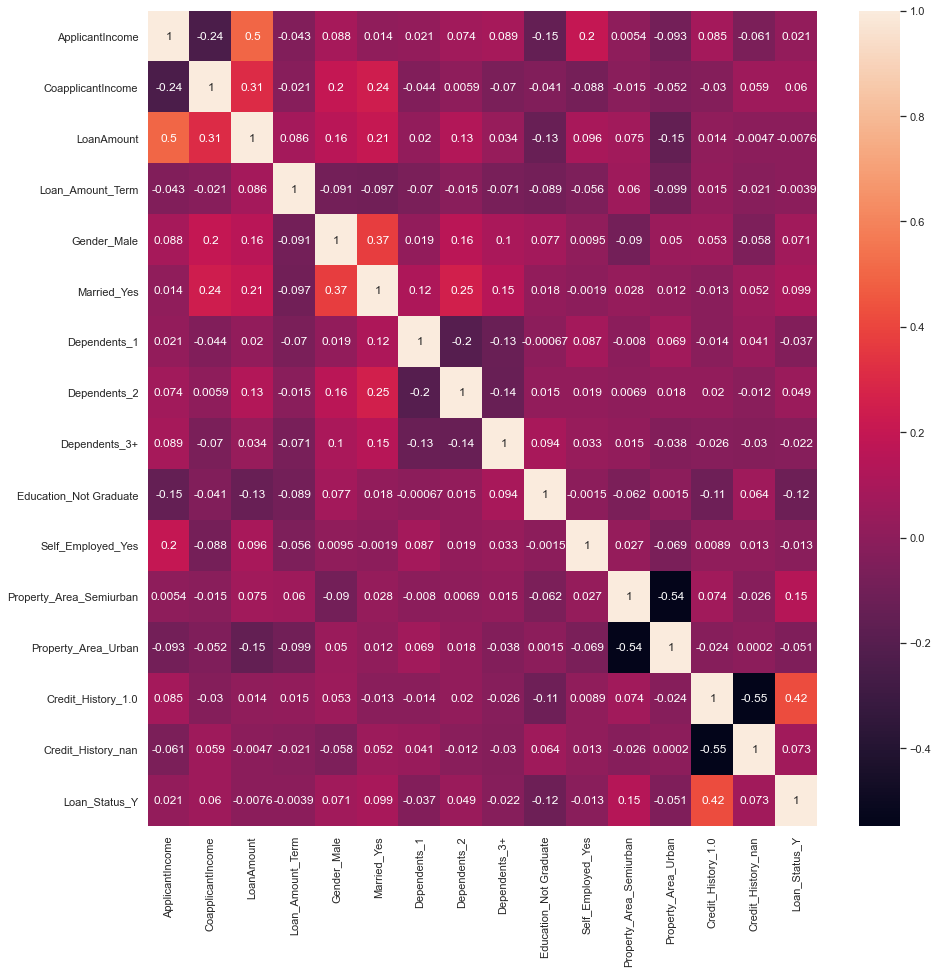

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(cor_df.corr(), annot=True)

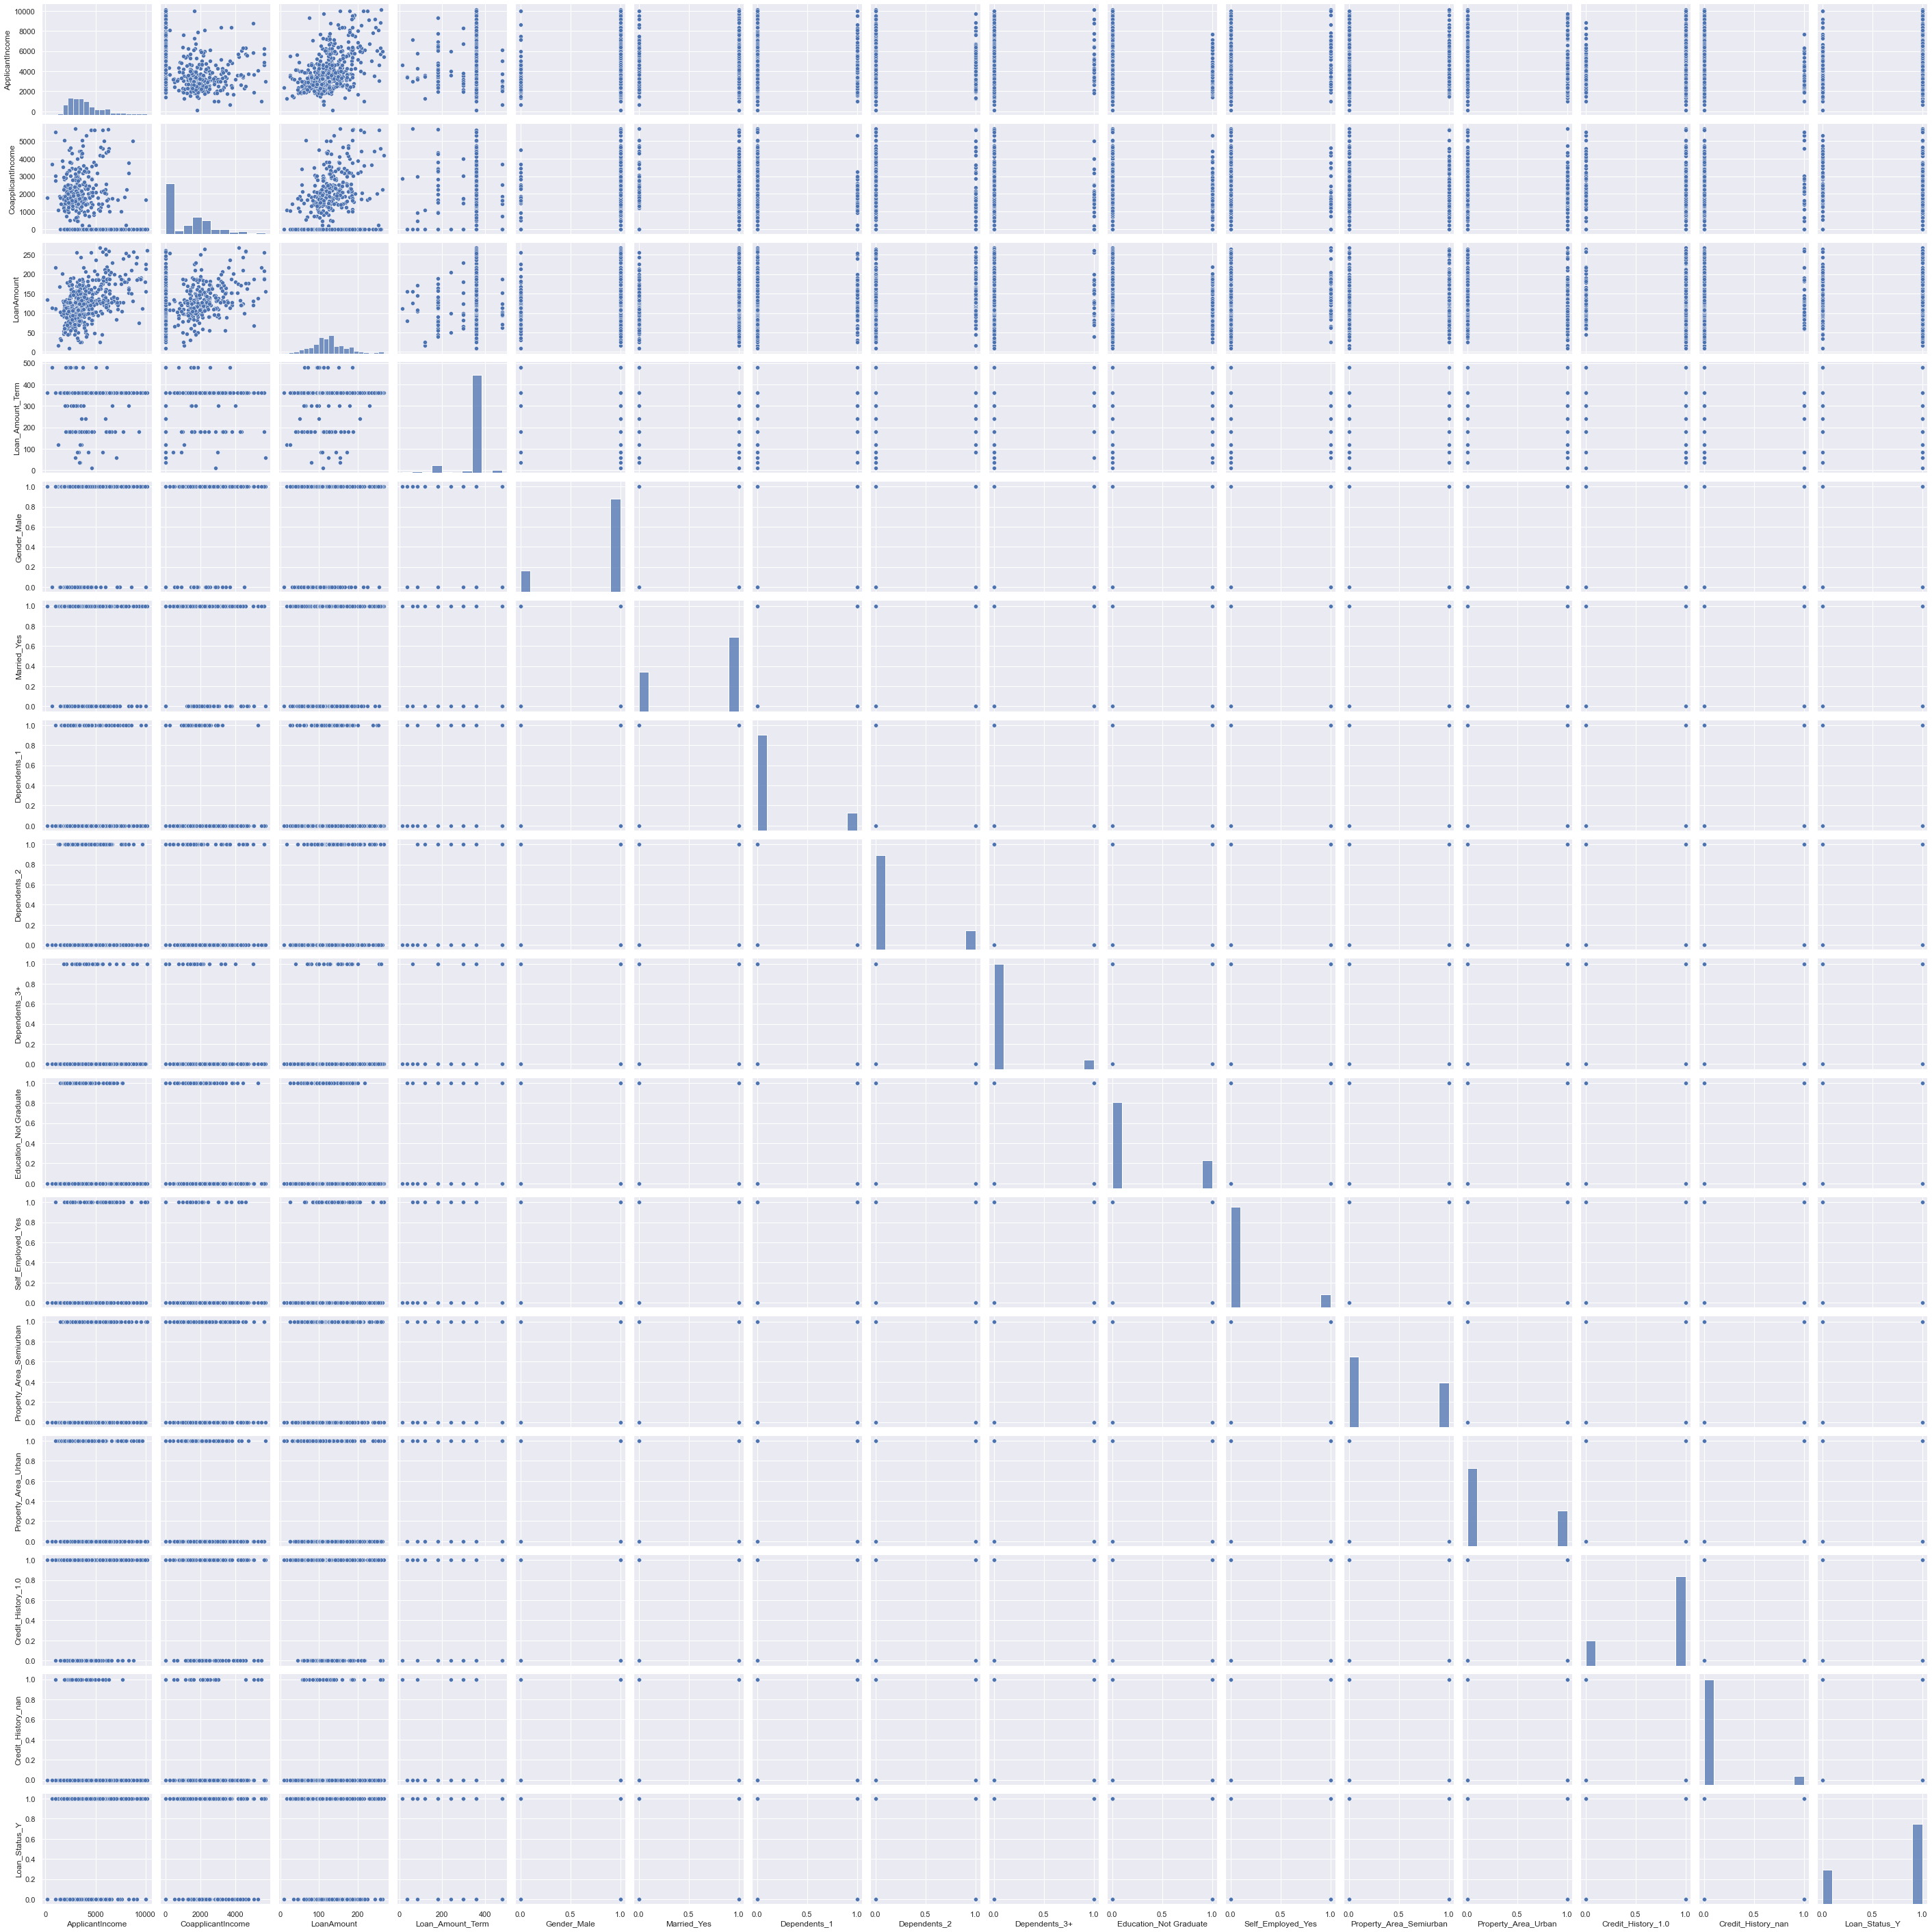

In [66]:
sns.pairplot(cor_df)

In [67]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_nan
0,5849,0.0,126.833656,360.0,Y,1,0,0,0,0,0,0,0,1,1,0
1,4583,1508.0,128.000000,360.0,N,1,1,1,0,0,0,0,0,0,1,0
2,3000,0.0,66.000000,360.0,Y,1,1,0,0,0,0,1,0,1,1,0
3,2583,2358.0,120.000000,360.0,Y,1,1,0,0,0,1,0,0,1,1,0
4,6000,0.0,141.000000,360.0,Y,1,0,0,0,0,0,0,0,1,1,0


In [68]:
df.size

7760

In [69]:
df.shape

(485, 16)

## Machine Learning 

In [70]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_nan
0,5849,0.0,126.833656,360.0,Y,1,0,0,0,0,0,0,0,1,1,0
1,4583,1508.0,128.000000,360.0,N,1,1,1,0,0,0,0,0,0,1,0
2,3000,0.0,66.000000,360.0,Y,1,1,0,0,0,0,1,0,1,1,0
3,2583,2358.0,120.000000,360.0,Y,1,1,0,0,0,1,0,0,1,1,0
4,6000,0.0,141.000000,360.0,Y,1,0,0,0,0,0,0,0,1,1,0


In [71]:
x = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Logistic Regression

In [73]:
model_lgr = LogisticRegression()

In [74]:
model_lgr.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
model_lgr.coef_

array([[ 1.00078738e-04,  2.47590449e-04, -6.28337528e-03,
        -3.00703238e-03, -1.81239401e-02,  2.62639601e-01,
        -3.13508208e-01, -6.35000951e-02, -1.45487029e-01,
        -6.38903872e-01, -1.29218678e-01,  6.13060215e-01,
         3.29540373e-01,  2.52292670e+00,  1.69681721e+00]])

In [76]:
model_lgr.intercept_

array([-0.18614545])

In [77]:
y_pred_lgr = model_lgr.predict(x_test)
y_pred_lgr

array(['Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [78]:
y_pred_prob = model_lgr.predict_proba(x_test)
print(y_pred_prob)

[[0.37443026 0.62556974]
 [0.32842288 0.67157712]
 [0.88133938 0.11866062]
 [0.2920069  0.7079931 ]
 [0.69924504 0.30075496]
 [0.13145459 0.86854541]
 [0.0656958  0.9343042 ]
 [0.07574815 0.92425185]
 [0.32688521 0.67311479]
 [0.29919009 0.70080991]
 [0.83856563 0.16143437]
 [0.15878836 0.84121164]
 [0.30034911 0.69965089]
 [0.0727267  0.9272733 ]
 [0.36126629 0.63873371]
 [0.76968993 0.23031007]
 [0.06824965 0.93175035]
 [0.23366133 0.76633867]
 [0.88343732 0.11656268]
 [0.2237582  0.7762418 ]
 [0.27286712 0.72713288]
 [0.1136355  0.8863645 ]
 [0.17985857 0.82014143]
 [0.5778815  0.4221185 ]
 [0.11554052 0.88445948]
 [0.03085165 0.96914835]
 [0.70912904 0.29087096]
 [0.17153296 0.82846704]
 [0.10013336 0.89986664]
 [0.84322074 0.15677926]
 [0.12781722 0.87218278]
 [0.21829435 0.78170565]
 [0.78117471 0.21882529]
 [0.18647333 0.81352667]
 [0.03125915 0.96874085]
 [0.36395585 0.63604415]
 [0.15835257 0.84164743]
 [0.2428987  0.7571013 ]
 [0.19011    0.80989   ]
 [0.17780404 0.82219596]


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

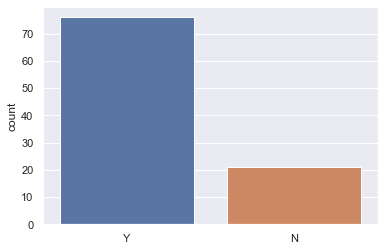

In [79]:
y_pred_lgr
sns.countplot(y_pred_lgr)

In [104]:
ac1 = accuracy_score(y_test,y_pred_lgr)

Text(0.5, 1.0, 'Confusion Matrix')

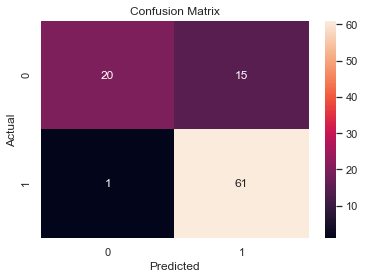

In [81]:
sns.heatmap(confusion_matrix(y_test,y_pred_lgr),annot=True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [82]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_lgr).ravel()
list1 = [tn,fp,fn,tp]
list2 = ['True_Negative','Flase_Positive','False_Negative','True_Positive']
for i,j in zip(list1,list2):
    print(f'{j} = {i}')

True_Negative = 20
Flase_Positive = 15
False_Negative = 1
True_Positive = 61


In [83]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           N       0.95      0.57      0.71        35
           Y       0.80      0.98      0.88        62

    accuracy                           0.84        97
   macro avg       0.88      0.78      0.80        97
weighted avg       0.86      0.84      0.82        97



In [84]:
y_test.value_counts()

Y    62
N    35
Name: Loan_Status, dtype: int64

In [85]:
output = y_test.values
print(type(output))                                    

<class 'numpy.ndarray'>


In [86]:
y_test1 =[]
for i in output:
    if i == 'Y':
        y_test1.append(1)
    elif i== 'N':
        y_test1.append(0)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

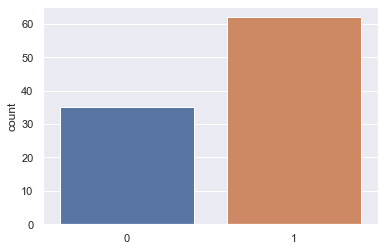

In [87]:
sns.countplot(y_test1)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

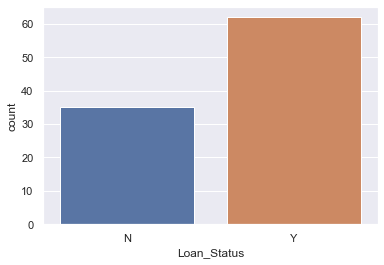

In [88]:
sns.countplot(y_test)

In [89]:
y_test1 = pd.Series(y_test1)

In [90]:
y_test1

0     0
1     1
2     0
3     1
4     0
     ..
92    1
93    1
94    1
95    1
96    1
Length: 97, dtype: int64

In [91]:
fpr,tpr, _ = roc_curve(y_test1, y_pred_prob[:,1])

In [92]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.05714286, 0.05714286, 0.08571429, 0.08571429, 0.11428571,
       0.11428571, 0.14285714, 0.14285714, 0.17142857, 0.17142857,
       0.2       , 0.2       , 0.22857143, 0.22857143, 0.25714286,
       0.25714286, 0.28571429, 0.28571429, 0.31428571, 0.31428571,
       0.34285714, 0.34285714, 0.37142857, 0.37142857, 0.4       ,
       0.4       , 0.42857143, 0.42857143, 1.        ])

In [93]:
tpr

array([0.        , 0.01612903, 0.03225806, 0.03225806, 0.11290323,
       0.11290323, 0.16129032, 0.16129032, 0.17741935, 0.17741935,
       0.27419355, 0.27419355, 0.30645161, 0.30645161, 0.37096774,
       0.37096774, 0.53225806, 0.53225806, 0.58064516, 0.58064516,
       0.62903226, 0.62903226, 0.66129032, 0.66129032, 0.75806452,
       0.75806452, 0.85483871, 0.85483871, 0.9516129 , 0.9516129 ,
       0.98387097, 0.98387097, 1.        , 1.        ])

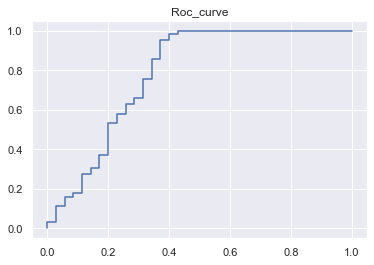

In [94]:
plt.plot(fpr,tpr)
plt.title('Roc_curve')
plt.show()

In [95]:
auc = roc_auc_score(y_test1,y_pred_prob[:,1])
print(auc)

0.7824884792626727


##### Logistic Regression Tuning

In [98]:
params = {'C':[0.5,0.6,0.7,0.8,0.9,1]}# C is the regualrization parameter
model = LogisticRegression()
gscv = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1]})

In [99]:
gscv.best_params_

{'C': 0.6}

In [100]:
model_lgr2 = gscv.best_estimator_

In [101]:
model_lgr.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
ac2 = accuracy_score(y_test, model_lgr2.predict(x_test))

In [109]:
error = (abs(ac2-ac1)/ac1)*100
print(f'This is the error percentage: {error}')

This is the error percentage: 0.0


### KNN Classifier

In [110]:
model_knn =KNeighborsClassifier(n_neighbors=5)

In [111]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [112]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [113]:
y_pred_knn = model_knn.predict(x_test)

In [114]:
accuracy_score(y_test,y_pred_knn)

0.6391752577319587

In [118]:
K = range(1,40,1)
Error = []
for i in K:
    modelknn = KNeighborsClassifier(i)
    modelknn.fit(x_train,y_train)
    Error.append(1-(accuracy_score(y_test,modelknn.predict(x_test))))
print(len(Error))

39


In [123]:
for i, j in enumerate(Error):
    print(i,j)

0 0.45360824742268047
1 0.44329896907216493
2 0.38144329896907214
3 0.4226804123711341
4 0.3608247422680413
5 0.4020618556701031
6 0.3608247422680413
7 0.3711340206185567
8 0.3711340206185567
9 0.38144329896907214
10 0.3711340206185567
11 0.38144329896907214
12 0.3402061855670103
13 0.3298969072164949
14 0.3402061855670103
15 0.35051546391752575
16 0.3402061855670103
17 0.3608247422680413
18 0.35051546391752575
19 0.35051546391752575
20 0.35051546391752575
21 0.35051546391752575
22 0.3608247422680413
23 0.3711340206185567
24 0.3608247422680413
25 0.3608247422680413
26 0.3608247422680413
27 0.3608247422680413
28 0.3608247422680413
29 0.3608247422680413
30 0.3608247422680413
31 0.3608247422680413
32 0.3608247422680413
33 0.3608247422680413
34 0.3608247422680413
35 0.3608247422680413
36 0.3608247422680413
37 0.3608247422680413
38 0.3608247422680413


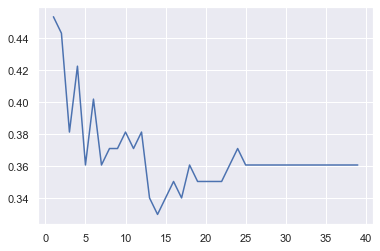

In [122]:
plt.plot(K, Error, 'b-')
plt.show()

In [124]:
modelknn_best = KNeighborsClassifier(n_neighbors=13, weights='distance', algorithm='ball_tree')

In [125]:
modelknn_best.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=13, weights='distance')

In [126]:
accuracy_score(y_test, modelknn_best.predict(x_test))

0.6494845360824743

In [128]:
params = {'n_neighbors':[10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree','brute']}
model = KNeighborsClassifier()
gscv1 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 11, 12, 13, 14, 15],
                         'weights': ['uniform', 'distance']})

In [129]:
gscv1.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 13, 'weights': 'distance'}

In [130]:
gscv1.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=13, weights='distance')

### LDA

In [131]:
model_lda = LinearDiscriminantAnalysis()#Assume that all classes have same variance covariance fuunction

In [132]:
model_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [133]:
y_pred_lda = model_lda.predict(x_test)

In [134]:
accuracy_score(y_test, y_pred_lda)

0.845360824742268

Text(0.5, 1.0, 'Confusion_Matrix')

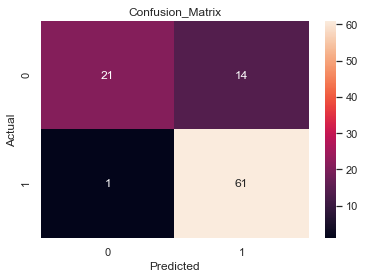

In [136]:
sns.heatmap(confusion_matrix(y_test,y_pred_lda), annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion_Matrix')

In [143]:
params = {'solver' : ['svd', 'lsqr', 'eigen'], 'shrinkage':[0,0.2,0.4,0.6,0.8] }
model = LinearDiscriminantAnalysis()
gscv2 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv2.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.80672661 0.80672661        nan 0.71648352 0.71648352
        nan 0.71648352 0.71648352        nan 0.71648352 0.71648352
        nan 0.69074259 0.69074259]
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': [0, 0.2, 0.4, 0.6, 0.8],
                         'solver': ['svd', 'lsqr', 'eigen']})

In [144]:
gscv2.best_params_

{'shrinkage': 0, 'solver': 'lsqr'}

In [145]:
modellda = gscv2.best_estimator_

In [146]:
modellda.fit(x_train,y_train)

LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')

In [147]:
accuracy_score(y_test,modellda.predict(x_test))

0.845360824742268

### QDA

In [154]:
model_qda = QuadraticDiscriminantAnalysis()#Different classes have diffferent variuance covariance functions

In [149]:
model_qda.fit(x_train,y_train)

QuadraticDiscriminantAnalysis()

In [150]:
accuracy_score(y_test, model_qda.predict(x_test))

0.8350515463917526

### Naive Bayes

In [151]:
model_nb = GaussianNB()

In [152]:
model_nb.fit(x_train, y_train)

GaussianNB()

In [153]:
accuracy_score(y_test, model_nb.predict(x_test))

0.7525773195876289

### Suppport Vector MAchines

In [155]:
model_svm = SVC()

In [156]:
model_svm.fit(x_train, y_train)

SVC()

In [157]:
y_pred_svm = model_svm.predict(x_test)

In [158]:
accuracy_score(y_test, y_pred_svm)

0.6391752577319587

In [162]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_nan
0,5849,0.0,126.833656,360.0,1,0,0,0,0,0,0,0,1,1,0
1,4583,1508.0,128.000000,360.0,1,1,1,0,0,0,0,0,0,1,0
2,3000,0.0,66.000000,360.0,1,1,0,0,0,0,1,0,1,1,0
3,2583,2358.0,120.000000,360.0,1,1,0,0,0,1,0,0,1,1,0
4,6000,0.0,141.000000,360.0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,0,0,0,0,0,0,0,0,0,1,0
610,4106,0.0,40.000000,180.0,1,1,0,0,1,0,0,0,0,1,0
611,8072,240.0,253.000000,360.0,1,1,1,0,0,0,0,0,1,1,0
612,7583,0.0,187.000000,360.0,1,1,0,1,0,0,0,0,1,1,0


In [164]:
sc = StandardScaler()

In [170]:
x_train_sta = sc.fit_transform(x_train)
x_train_sta

array([[-0.48848126,  1.21926163,  0.21048942, ...,  1.50349732,
         0.49354812, -0.28421813],
       [-0.06021044,  1.39514708,  1.70250347, ..., -0.66511592,
         0.49354812, -0.28421813],
       [ 1.0532937 ,  0.24876327,  1.27621374, ..., -0.66511592,
         0.49354812, -0.28421813],
       ...,
       [ 3.07713447,  0.27726645,  2.08616422, ..., -0.66511592,
         0.49354812, -0.28421813],
       [-0.39238147,  1.10663933,  0.35969083, ...,  1.50349732,
         0.49354812, -0.28421813],
       [-0.13489669, -0.19755474, -0.57814657, ..., -0.66511592,
         0.49354812, -0.28421813]])

In [171]:
x_test_sta = sc.fit_transform(x_test)
x_test_sta

array([[ 6.24703058e-01, -1.11724600e+00,  1.97489244e-01, ...,
        -7.34630887e-01,  6.85344417e-01, -3.19801075e-01],
       [ 1.15514136e-03,  1.10103092e-01, -3.79126974e-01, ...,
        -7.34630887e-01,  6.85344417e-01, -3.19801075e-01],
       [-9.92090220e-01, -4.82882981e-02, -5.47306704e-01, ...,
         1.36122782e+00, -1.45912037e+00, -3.19801075e-01],
       ...,
       [-1.82011121e+00,  2.93462676e+00,  2.19162033e+00, ...,
        -7.34630887e-01, -1.45912037e+00,  3.12694384e+00],
       [-6.22392775e-01, -1.11724600e+00, -9.79768868e-01, ...,
        -7.34630887e-01,  6.85344417e-01, -3.19801075e-01],
       [-8.74709584e-02,  1.10103092e-01,  2.45540595e-01, ...,
        -7.34630887e-01,  6.85344417e-01, -3.19801075e-01]])

##### Tunning

In [177]:
params = {'C':[0.01,0.3,0.5,0.7,0.9,1.2,1.4,1.6,1.8], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
model = SVC(probability=True)
gscv3 = GridSearchCV(model,params, cv=5, n_jobs=-1)
gscv3.fit(x_train_sta,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.3, 0.5, 0.7, 0.9, 1.2, 1.4, 1.6, 1.8],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [178]:
gscv3.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [179]:
model_svmb = gscv3.best_estimator_

In [180]:
accuracy_score(y_test, model_svmb.predict(x_test))#svm is not giving good results

0.6391752577319587

### Decision Trees

In [232]:
dt = DecisionTreeClassifier( min_samples_leaf=40)

In [233]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=40)

In [234]:
y_pred_dt = dt.predict(x_test)

In [235]:
accuracy_score(y_test, y_pred_dt)

0.7525773195876289

In [236]:
text_presentatioin = export_text(dt)
print(text_presentatioin)

|--- feature_13 <= 0.50
|   |--- class: N
|--- feature_13 >  0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_1 <= 8.06
|   |   |   |--- feature_0 <= 4611.00
|   |   |   |   |--- class: Y
|   |   |   |--- feature_0 >  4611.00
|   |   |   |   |--- class: Y
|   |   |--- feature_1 >  8.06
|   |   |   |--- feature_2 <= 126.42
|   |   |   |   |--- class: Y
|   |   |   |--- feature_2 >  126.42
|   |   |   |   |--- class: Y
|   |--- feature_11 >  0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: Y
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_0 <= 3873.00
|   |   |   |   |--- class: Y
|   |   |   |--- feature_0 >  3873.00
|   |   |   |   |--- class: Y



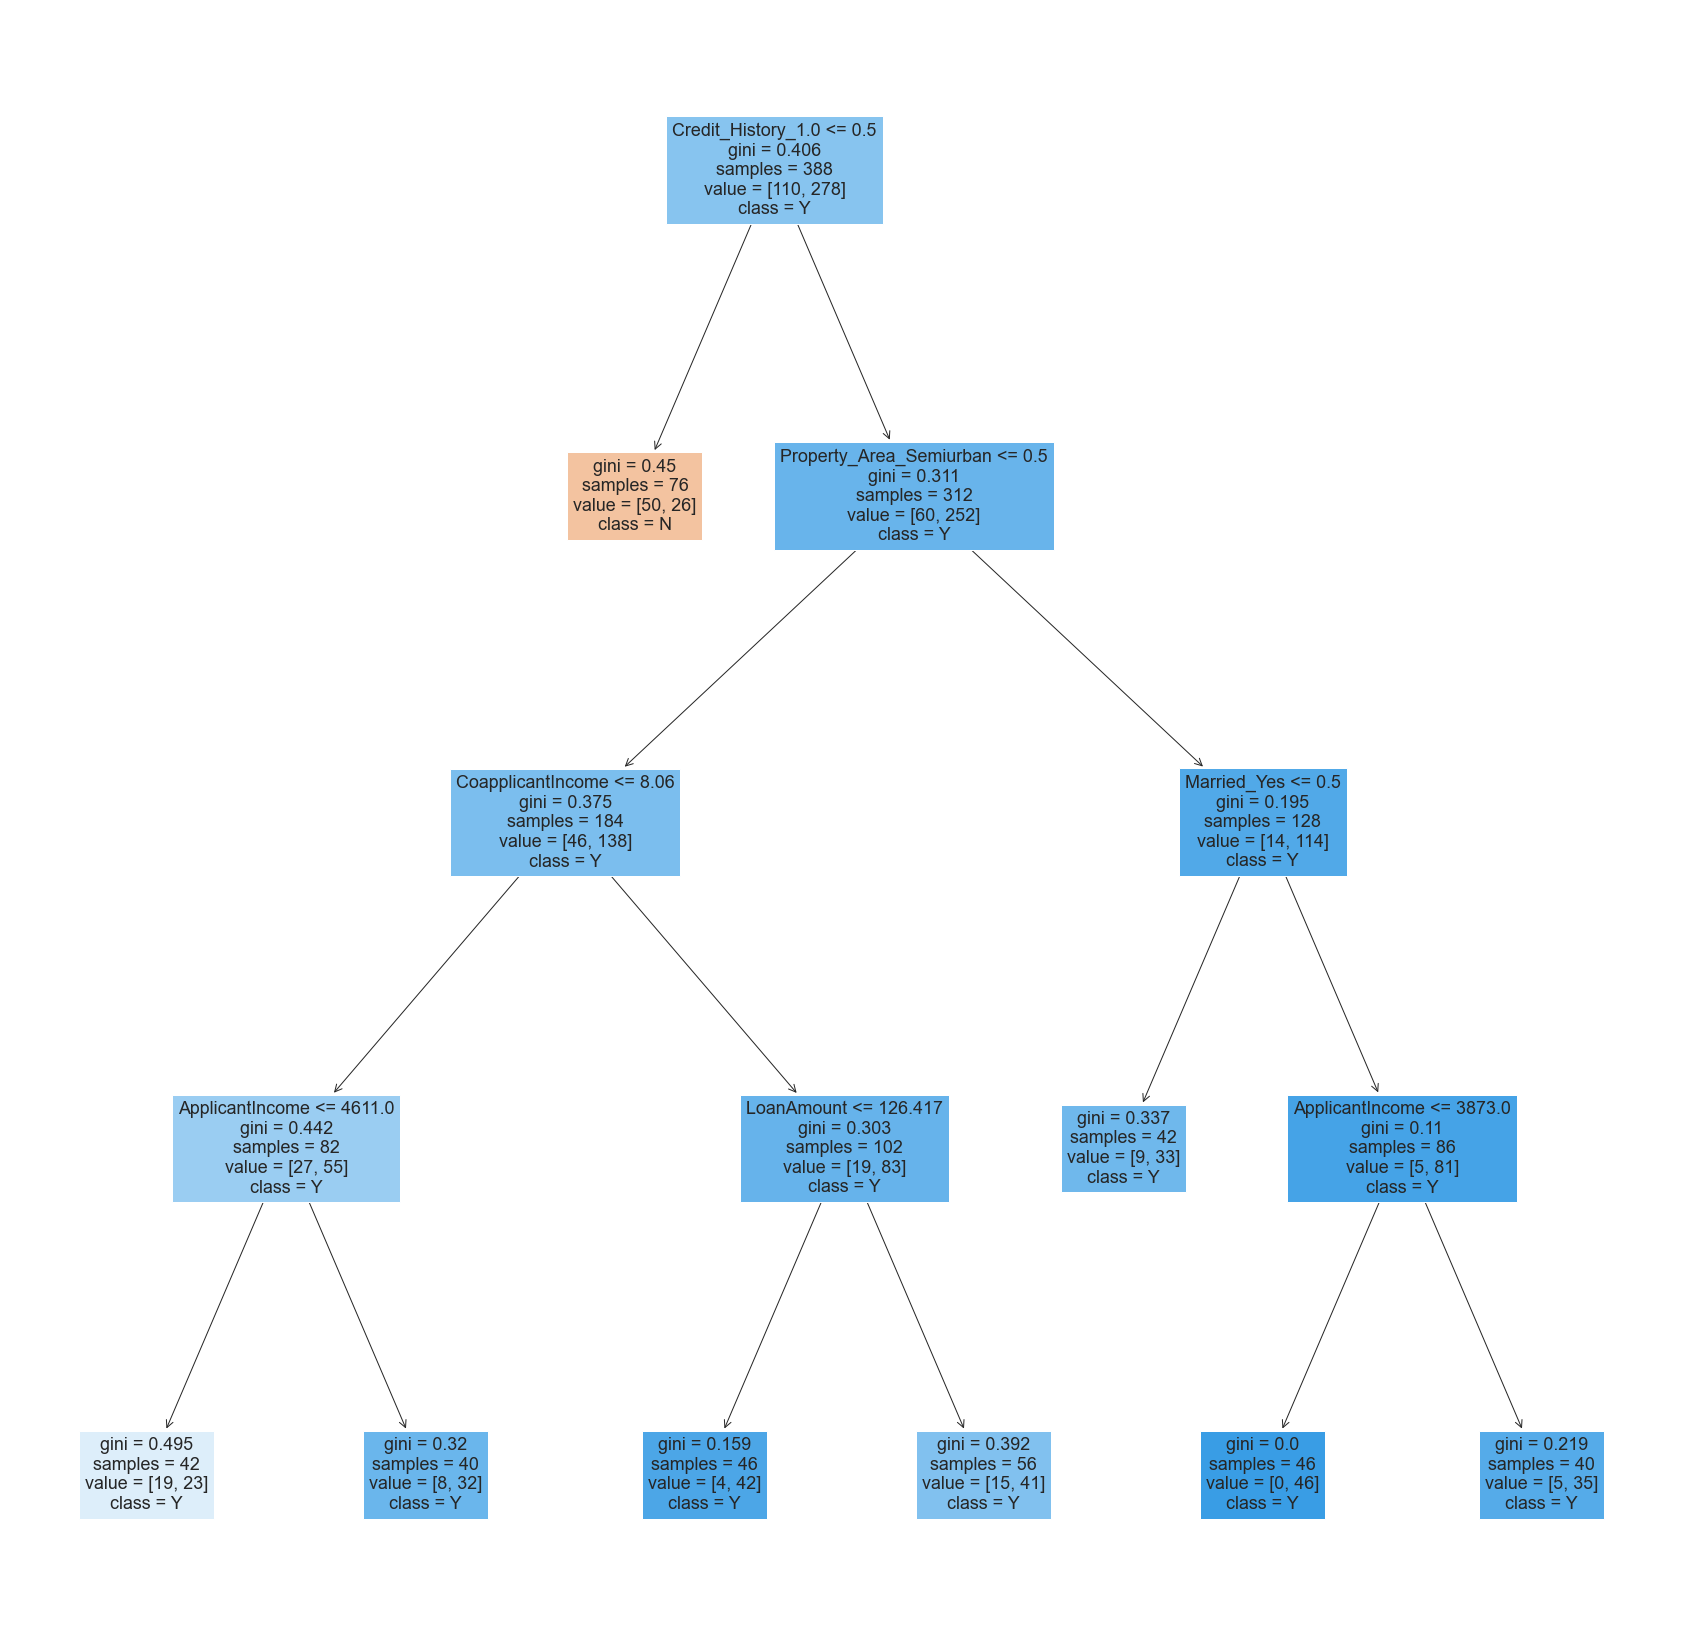

In [237]:
plt.figure(figsize=(30,30))
plot_tree(dt, class_names=['N','Y'], feature_names=x.columns, filled=True)
plt.show()

In [238]:
params = {'max_depth':[4,5,6], 'min_samples_leaf':[20,30,40,50], 'min_samples_split':[20,30,40]}
model = DecisionTreeClassifier()
gscv4 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv4.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [20, 30, 40]})

In [239]:
gscv4.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 20}

In [240]:
clt = gscv4.best_estimator_

In [241]:
accuracy_score(y_test,clt.predict(x_test))

0.845360824742268

## Ensemble Techniques

### 1. Bagging

In [244]:
bcl = BaggingClassifier(n_estimators=50)#Trees are highly correlated

In [245]:
bcl.fit(x_train, y_train)

BaggingClassifier(n_estimators=50)

In [246]:
accuracy_score(y_test, bcl.predict(x_test))

0.8144329896907216

### 2. Random Forrest

In [247]:
rcl = RandomForestClassifier(n_estimators=100)

In [248]:
rcl.fit(x_train,y_train)

RandomForestClassifier()

In [249]:
accuracy_score(y_test, rcl.predict(x_test))

0.845360824742268

### 3. Extra Trees Classifier

In [250]:
ecl = ExtraTreesClassifier(n_estimators=500)

In [252]:
ecl.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=500)

In [253]:
accuracy_score(y_test,ecl.predict(x_test))

0.8041237113402062

### 4. Gradient Boost Classifier

In [254]:
gbc = GradientBoostingClassifier(n_estimators=50)#These are highly overfitting

In [255]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [256]:
accuracy_score(y_test,gbc.predict(x_test))

0.8247422680412371

### 5. Ada Boosting Classifier

In [257]:
abc = AdaBoostClassifier(n_estimators=50)#Highly overfitted

In [258]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [259]:
accuracy_score(y_test, abc.predict(x_test))

0.8144329896907216

### 6. XGB classifier

In [260]:
xgb = XGBClassifier()

In [261]:
xgb.fit(x_train,y_train)

[14:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

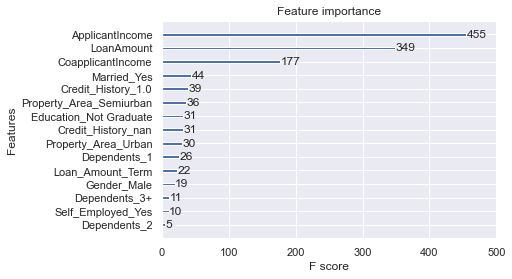

In [264]:
plot_importance(xgb)

In [265]:
accuracy_score(y_test,xgb.predict(x_test))

0.7835051546391752

### 7. Voting Classifier - Hard Voting

In [269]:
model1 = LogisticRegression()
model2 = LinearDiscriminantAnalysis()
model3 = RandomForestClassifier()
T1 = ('lgr', model1)
T2 = ('lda', model2)
T3 = ('rcl', model3)
vc = VotingClassifier(estimators=[T1,T2,T3], voting='hard')

In [270]:
vc.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lgr', LogisticRegression()),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('rcl', RandomForestClassifier())])

In [271]:
accuracy_score(y_test,vc.predict(x_test))

0.845360824742268

### 8.Voting Classifier - Soft Voting

In [273]:
model1 = LogisticRegression()
model2 = LinearDiscriminantAnalysis()
model3 = RandomForestClassifier()
T1 = ('lgr', model1)
T2 = ('lda', model2)
T3 = ('rcl', model3)
vc1 = VotingClassifier(estimators=[T1,T2,T3], voting='soft')

In [274]:
vc1.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lgr', LogisticRegression()),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('rcl', RandomForestClassifier())],
                 voting='soft')

In [275]:
accuracy_score(y_test,vc1.predict(x_test))

0.845360824742268

### 9. Stacking classifier

In [278]:
s1 = ('lgr', LogisticRegression())
s2 = ('lda', LinearDiscriminantAnalysis())
meta_model = RandomForestClassifier(n_estimators=100)
stcl = StackingClassifier(estimators=[s1,s2], final_estimator=meta_model)

In [279]:
stcl.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

StackingClassifier(estimators=[('lgr', LogisticRegression()),
                               ('lda', LinearDiscriminantAnalysis())],
                   final_estimator=RandomForestClassifier())

In [280]:
accuracy_score(y_test,stcl.predict(x_test))

0.7835051546391752